<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Model: "sequential"
_________________________________________________________________
 Layer (

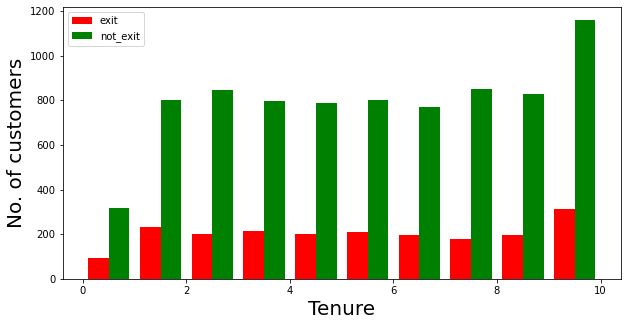

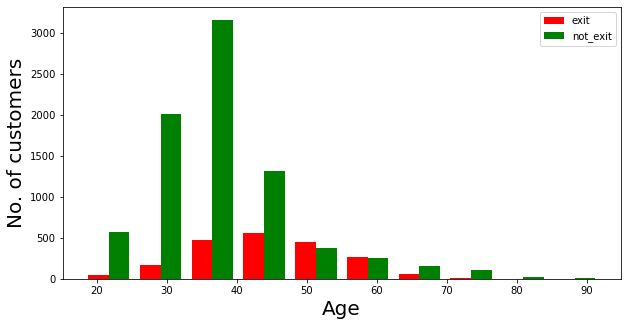

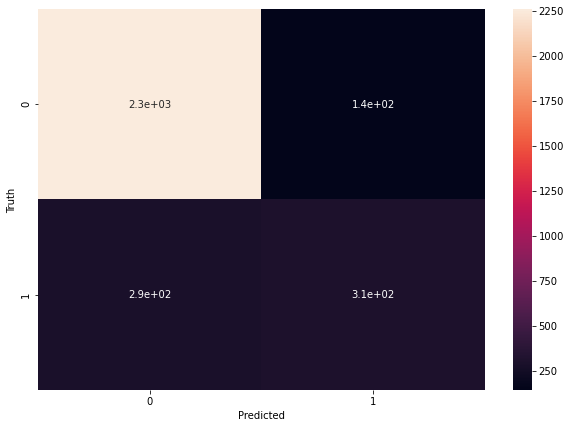

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries
df = pd.read_csv("Churn_Modelling.csv")
df.head()
df.shape
df.describe()
df.isnull()
df.isnull().sum()
df.info()
df.dtypes
df.columns
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns
df.head()
def visualization(x, y, xlabel):   
     plt.figure(figsize=(10,5))
     plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
     plt.xlabel(xlabel,fontsize=20)
     plt.ylabel("No. of customers", fontsize=20)
     plt.legend()
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']
visualization(df_churn_exited, df_churn_not_exited, "Tenure")
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']
visualization(df_churn_exited2, df_churn_not_exited2, "Age")
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)
df = pd.concat([df,gender,states], axis = 1)
df.head()
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test
import keras#Can use Tenserflow as well but won't be able to understand the errors initially.
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers
classifier = Sequential()
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform")) #Adding second hidden layers
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm
accuracy = accuracy_score(y_test,y_pred)
accuracy
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test,y_pred))
